In [79]:
## I always import these
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

## relevant for this notebook
import cartopy.crs as ccrs

## python functions written by me that I frequently use
import alexas_functions
# alexas_functions.list_my_functions()

## relevant for this notebook
## link: https://pypi.org/project/global-land-mask/
from global_land_mask import globe

In [80]:
#### OPEN DATA
## open a had file (single ensemble member)
had_sat_sst_name = alexas_functions.get_filename('had_ensm', 'tas', omtype='obs')
print('observation dataset:\n', had_sat_sst_name)
had_sat_sst = xr.open_dataset(had_sat_sst_name)
had_sat_sst.close()
had_sat_sst = alexas_functions.uniform_coords(had_sat_sst, ['latitude','longitude'])

mpi_tas_hist_name= alexas_functions.get_filename('mpi_ensm', 'tas')
mpi_tas_hist = xr.open_dataset(mpi_tas_hist_name)
mpi_tas_hist.close()
print('model dataset:\n', mpi_tas_hist_name)

mpi_tas_rcp85_name= alexas_functions.get_filename('mpi_ensm', 'tas', exp='rcp85')
mpi_tas_rcp85 = xr.open_dataset(mpi_tas_rcp85_name)
mpi_tas_rcp85.close()
print('model dataset:\n', mpi_tas_rcp85_name)

mpi_tas = xr.merge([mpi_tas_hist, mpi_tas_rcp85])
mpi_tas = alexas_functions.uniform_coords(mpi_tas)
print('model datasets merged')

observation dataset:
 C:\Users\alexa\Documents\RESEARCH\DATA\had_ensm\Version_4.6\temperature_anomaly\HadCRUT.4.6.0.0.anomalies.1.nc
model dataset:
 C:\Users\alexa\Documents\RESEARCH\DATA\mpi_ensm\tas\tas_Amon_MPI-ESM_historical_r001i1850p3_185001-200512.nc
model dataset:
 C:\Users\alexa\Documents\RESEARCH\DATA\mpi_ensm\tas\tas_Amon_MPI-ESM_rcp85_r001i2005p3_200601-209912.nc
model datasets merged


In [8]:
# def calculate_percent_ocean(da, subdiv=10, lat_var='lat', lon_var='lon'):
#     ##da is xarray dataset
#     lat = da[lat_var].values
#     lon = da[lon_var].values
        
#     print(lon)
#     irange = range(0,lat.size)
#     jrange = range(0,lon.size)

#     ## initializing the mask for percentage ocean at each gridd point
#     percents = np.zeros((lat.size, lon.size))
    
#     ## latitude loop
#     print('Making a data array representing the % ocean area in each latlon grid box for the globe')
#     print('grid shape (lat, lon):', percents.shape)
#     print('')
#     print('current latitude:')
#     for i in irange:
#         currlat1 = lat[i] 
#         print(int(currlat1*100)/100, end=', ')
        
#         ## if lat ==-90, do nothing
#         if currlat1==-90.:
#             continue
            
#         else:
#             ##if not the last latitude
#             if i<(lat.size-1):
                
#                 lat_incr = (lat[i] - lat[i+1])
#                 lat_incr12 = abs(lat_incr/2)
#                 currlatspan = (lat[i]) - lat_incr12, (lat[i]) + lat_incr12
                
#             ## if the last latitude (and not lat=90)    
#             elif i==lat.size-1:
#                 lat_incr = (-lat[i] + lat[i-1])
#                 lat_incr12 = abs(lat_incr/2)
#                 currlatspan = (lat[i]) - lat_incr12, (lat[i]) + lat_incr12


#             ## lon loop
#             for j in jrange:
#                 currlon1 = lon[j]
                
#                 if j<(lon.size-1):
#                     lon_incr = (lon[j] - lon[j+1])
#                     lon_incr12 = abs(lon_incr/2)
#                     currlonspan = (lon[j]) - lon_incr12, (lon[j]) + lon_incr12
                    
#                     ## this is where the longitude value switches from -180 to 180.
#                     if j==(lon.size/2)-1:
#                         lon_incr = (-lon[j] + lon[j-1])
#                         lon_incr12 = abs(lon_incr/2)
#                         currlonspan = (lon[j]) - lon_incr12, (lon[j]) + lon_incr12
                        
#                 ## last longitude value
#                 elif j==lon.size-1:
#                     lon_incr = (-lon[j] + lon[j-1])
#                     lon_incr12 = abs(lon_incr/2)
#                     currlonspan = (lon[j]) - lon_incr12, (lon[j]) + lon_incr12 

                
#                 percentocean = 0
#                 ## the reason for cutting of the last index value is so that it is not double counted
#                 ## for example, if lat1 = 70 degrees, lat2 =71 degrees, sublat1 should only range 70 to 70.9, 
#                 ## because 71 will be counted when the code gets to 71. 
#                 sub_lat = np.linspace(currlatspan[0], currlatspan[1], subdiv)[0:subdiv-1] 
#                 sub_lon = np.linspace(currlonspan[0], currlonspan[1], subdiv)[0:subdiv-1]
                
#                 ##################################################################
#                 ## this is where the longitude value switches from -180 to 180.
#                 if j==(lon.size/2):
#                     sub_lon1 = np.linspace(currlonspan[0]+360, currlonspan[0]+360+lon_incr12, int(subdiv/2)-1)
#                     sub_lon2 = np.linspace(currlonspan[0]+lon_incr12, currlonspan[1], int(subdiv/2))
#                     sub_lon = np.hstack((sub_lon1, sub_lon2))
#                 ##################################################################
                
#                 ## the code gets angry when the latitude goes over 90. luckily, this lat band is all ocean
#                 if currlat1==90.:
#                     percents[i, j]= (subdiv-1)**2 ## this will plug in a 100% because it is all ocean at this lat band..
                
#                 else:
#                     for ii in range(0, sub_lat.size):
#                         for jj in range(0, sub_lon.size):
#                             print(sub_lon)
#                             if globe.is_ocean( sub_lat[ii], sub_lon[jj] ):
#                                  percentocean+=1
#                             else:
#                                  continue       
#                     percents[i, j] = percentocean 
    
#     ## normalize mask to be from 0 to 100
#     percents = (percents/((subdiv-1)**2))*100     
    
#     print('... done.')
#     return percents

In [210]:
def calculate_percent_ocean1(da, subdiv=10, lat_var='lat', lon_var='lon'):
    ##da is xarray dataset
    lat = da[lat_var].values
    lon = da[lon_var].values
        
    #print(lon)
    irange = range(0,lat.size)
    jrange = range(0,lon.size)

    ## initializing the mask for percentage ocean at each gridd point
    percents = np.zeros((lat.size, lon.size))
    
    ## latitude loop
    print('Making a data array representing the % ocean area in each latlon grid box for the globe')
    print('grid shape (lat, lon):', percents.shape)
    print('')
    print('current latitude:')
    ##### ----- LAT LOOP 
    for i in irange:
        currlat1 = lat[i] 
        print(round(currlat1,3))

        ## if not the last latitude
        if currlat1==lat[lat.size-1]:
            lat_incr = (-lat[i] + lat[i-1])
        else:
            lat_incr = (lat[i] - lat[i+1])
            
        lat_incr12 = abs(lat_incr/2)
        currlatspan = (lat[i]) - lat_incr12, (lat[i]) + lat_incr12

        ##### ----- LON LOOP 
        for j in jrange:

            currlon1 = lon[j]
            if currlon1==lon[lon.size-1]:
                lon_incr = (-lon[j] + lon[j-1])          
            else: 
                lon_incr = (lon[j] - lon[j+1])
                
            lon_incr12 = abs(lon_incr/2)
            currlonspan = (lon[j]) - lon_incr12, (lon[j]) + lon_incr12 


            percentocean = 0
            sub_lat = np.linspace(currlatspan[0], currlatspan[1], subdiv+1)[0:subdiv] 
            sub_lon = np.linspace(currlonspan[0], currlonspan[1], subdiv+1)[0:subdiv]

            ind_n = np.where(sub_lon<-180)[0]
            sub_lon[ind_n] = sub_lon[ind_n] + 360

            ind_p = np.where(sub_lon>180)[0]
            sub_lon[ind_p] = sub_lon[ind_p] - 360
            
            print(sub_lon)
                
            for ii in range(0, sub_lat.size):
                for jj in range(0, sub_lon.size):

                    if globe.is_ocean( sub_lat[ii], sub_lon[jj] ):
                         percentocean+=1
                    else:
                         continue 

            ## should be inside lat loop, inside lon loop                
            percents[i, j] = percentocean

    print('... done.')
    return percents

                
p1 = calculate_percent_ocean1(mpi_tas)

Making a data array representing the % ocean area in each latlon grid box for the globe
grid shape (lat, lon): (96, 192)

current latitude:
-88.572
[ 179.0625  179.25    179.4375  179.625   179.8125 -180.     -179.8125
 -179.625  -179.4375 -179.25  ]
[-179.0625 -178.875  -178.6875 -178.5    -178.3125 -178.125  -177.9375
 -177.75   -177.5625 -177.375 ]
[-177.1875 -177.     -176.8125 -176.625  -176.4375 -176.25   -176.0625
 -175.875  -175.6875 -175.5   ]
[-175.3125 -175.125  -174.9375 -174.75   -174.5625 -174.375  -174.1875
 -174.     -173.8125 -173.625 ]
[-173.4375 -173.25   -173.0625 -172.875  -172.6875 -172.5    -172.3125
 -172.125  -171.9375 -171.75  ]
[-171.5625 -171.375  -171.1875 -171.     -170.8125 -170.625  -170.4375
 -170.25   -170.0625 -169.875 ]
[-169.6875 -169.5    -169.3125 -169.125  -168.9375 -168.75   -168.5625
 -168.375  -168.1875 -168.    ]
[-167.8125 -167.625  -167.4375 -167.25   -167.0625 -166.875  -166.6875
 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.56

[-8.4375 -8.25   -8.0625 -7.875  -7.6875 -7.5    -7.3125 -7.125  -6.9375
 -6.75  ]
[-6.5625 -6.375  -6.1875 -6.     -5.8125 -5.625  -5.4375 -5.25   -5.0625
 -4.875 ]
[-4.6875 -4.5    -4.3125 -4.125  -3.9375 -3.75   -3.5625 -3.375  -3.1875
 -3.    ]
[-2.8125 -2.625  -2.4375 -2.25   -2.0625 -1.875  -1.6875 -1.5    -1.3125
 -1.125 ]
[-0.9375 -0.75   -0.5625 -0.375  -0.1875  0.      0.1875  0.375   0.5625
  0.75  ]
[0.9375 1.125  1.3125 1.5    1.6875 1.875  2.0625 2.25   2.4375 2.625 ]
[2.8125 3.     3.1875 3.375  3.5625 3.75   3.9375 4.125  4.3125 4.5   ]
[4.6875 4.875  5.0625 5.25   5.4375 5.625  5.8125 6.     6.1875 6.375 ]
[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.    

[-175.3125 -175.125  -174.9375 -174.75   -174.5625 -174.375  -174.1875
 -174.     -173.8125 -173.625 ]
[-173.4375 -173.25   -173.0625 -172.875  -172.6875 -172.5    -172.3125
 -172.125  -171.9375 -171.75  ]
[-171.5625 -171.375  -171.1875 -171.     -170.8125 -170.625  -170.4375
 -170.25   -170.0625 -169.875 ]
[-169.6875 -169.5    -169.3125 -169.125  -168.9375 -168.75   -168.5625
 -168.375  -168.1875 -168.    ]
[-167.8125 -167.625  -167.4375 -167.25   -167.0625 -166.875  -166.6875
 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -

 -4.875 ]
[-4.6875 -4.5    -4.3125 -4.125  -3.9375 -3.75   -3.5625 -3.375  -3.1875
 -3.    ]
[-2.8125 -2.625  -2.4375 -2.25   -2.0625 -1.875  -1.6875 -1.5    -1.3125
 -1.125 ]
[-0.9375 -0.75   -0.5625 -0.375  -0.1875  0.      0.1875  0.375   0.5625
  0.75  ]
[0.9375 1.125  1.3125 1.5    1.6875 1.875  2.0625 2.25   2.4375 2.625 ]
[2.8125 3.     3.1875 3.375  3.5625 3.75   3.9375 4.125  4.3125 4.5   ]
[4.6875 4.875  5.0625 5.25   5.4375 5.625  5.8125 6.     6.1875 6.375 ]
[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.56

[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -

 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.

 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    

[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.

 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  

 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.5   ]
[49.6875 49.875  50.0625 50.25   50.4375 50.625  50.8125 51.     51.1875
 51.375 ]
[51.5625 51.75   51.9375 52.125  52.3125 52.5    52.6875 52.875  53.0625
 53.25  ]
[53.4375 53.625  53.8125 54.     54.1875 54.375  54.5625 54.75   54.9375
 55.

[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -

[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.

 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -132.75   -132.5625 -132.375 ]
[-132.1875 -132.     -131.8125 -131.625  -131.4375 -131.25   -131.0625
 -130.875  -130.6875 -130.5   ]
[-130.3125 -130.125  -129.9375 -129.75   -129.5625 -129.375  -129.1875
 -129.     -128.8125 -128.625 ]
[-128.4375 -128.25   -128.0625 -127.875  -127.6875 -127.5    -127.3125
 -127.125  -126.9375 -126.75  ]
[-126.5625 -126.375  -126.1875 -126.     -125.8125 -125.625  -125.4375
 -125.25   -125.0625 -124.875 ]
[-124.6875 -124.5    -124.3125 -124.125  -123.9375 -123.75   -123.5625
 -123.375  -123.1875 -123.    ]
[-122.8125 -122.625  -122.4375 -122.25   

[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.5   ]
[49.6875 49.875  50.0625 50.25   50.4375 50.625  50.8125 51.     51.1875
 51.375 ]
[51.5625 51.75   51.9375 52.125  52.3125 52.5    52.6875 52.875  53.0625
 53.25  ]
[53.4375 53.625  53.8125 54.     54.1875 54.375  54.5625 54.75   54.9375
 55.125 ]
[55.3125 55.5    55.6875 55.875  56.0625 56.25   56.4375 56.625  56.8125
 57.    ]
[57.

[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -132.75   -132.5625 -132.375 ]
[-132.1875 -132.     -131.8125 -131.625  -131.4375 -131.25   -131.0625
 -130.875  -130.6875 -130.5   ]
[-130.3125 -130.125  -129.9375 -129.75   -129.5625 -129.375  -129.1875
 -129.     -128.8125 -128.625 ]
[-128.4375 -128.25   -128.0625 -127.875  -127.6875 -127.5    -127.3125
 -127.125  -126.9375 -126.75  ]
[-126.5625 -126.375  -126.1875 -126.     -125.8125 -125.625  -125.4375
 -

[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.5   ]
[49.6875 49.875  50.0625 50.25   50.4375 50.625  50.8125 51.     51.1875
 51.375 ]
[51.

 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -132.75   -132.5625 -132.375 ]
[-132.1875 -132.     -131.8125 -131.625  -131.4375 -131.25   -131.0625
 -130.875  -130.6875 -130.5   ]
[-130.3125 -130.125  -129.9375 -129.75   -129.5625 -129.375  -129.1875
 -129.     -128.8125 -128.625 ]
[-128.4375 -128.25   -128.0625 -127.875  -127.6875 -127.5    -127.3125
 -127.125  -126.9375 -126.75  ]
[-126.5625 -126.375  -126.1875 -126.     -125.8125 -125.625  -125.4375
 -125.25   -125.0625 -124.875 ]
[-124.6875 -124.5    -124.3125 -124.125  

[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.5   ]
[49.6875 49.875  50.0625 50.25   50.4375 50.625  50.8125 51.     51.1875
 51.375 ]
[51.5625 51.75   51.9375 52.125  52.3125 52.5    52.6875 52.875  53.0625
 53.25  ]
[53.4375 53.625  53.8125 54.     54.1875 54.375  54.5625 54.75   54.9375
 55.125 ]
[55.3125 55.5    55.6875 55.875  56.0625 56.25   56.4375 56.625  56.8125
 57.    ]
[57.

 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -132.75   -132.5625 -132.375 ]
[-132.1875 -132.     -131.8125 -131.625  -131.4375 -131.25   -131.0625
 -130.875  -130.6875 -130.5   ]
[-130.3125 -130.125  -129.9375 -129.75   -129.5625 -129.375  -129.1875
 -129.     -128.8125 -128.625 ]
[-128.4375 -128.25   -128.0625 -127.875  -127.6875 -127.5    -127.3125
 -127.125  -126.9375 -126.75  ]
[-126.5625 -126.375  -126.1875 -126.     -125.8125 -125.625  -125.4375
 -125.25   -125.0625 -124.875 ]
[-124.6875 -124.5    -124.3125 -124.125  -123.9375 -123.75   -123.5625
 -123.375  -123.1875 -123.    ]
[-122.8125 -122.625  -122.4375 -122.25   -122.0625 -121.875  -121.6875
 -121.5    -121.3125 -121.125 ]
[-120.9375 -120.75   -120.5625 -120.375  -120.1875 -120.     -119.8125
 -119.625  -119.4375 -119.25  ]
[-119.0625 -118.875  -118.6875 -118.5    

 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.5   ]
[49.6875 49.875  50.0625 50.25   50.4375 50.625  50.8125 51.     51.1875
 51.375 ]
[51.5625 51.75   51.9375 52.125  52.3125 52.5    52.6875 52.875  53.0625
 53.25  ]
[53.4375 53.625  53.8125 54.     54.1875 54.375  54.5625 54.75   54.9375
 55.125 ]
[55.3125 55.5    55.6875 55.875  56.0625 56.25   56.4375 56.625  56.8125
 57.    ]
[57.1875 57.375  57.5625 57.75   57.9375 58.125  58.3125 58.5    58.6875
 58.875 ]
[59.0625 59.25   59.4375 59.625  59.8125 60.     60.1875 60.375  60.5625
 60.75  ]
[60.9375 61.125  61.3125 61.5    61.6875 61.875  62.0625 62.25   62.4375
 62.

 -129.     -128.8125 -128.625 ]
[-128.4375 -128.25   -128.0625 -127.875  -127.6875 -127.5    -127.3125
 -127.125  -126.9375 -126.75  ]
[-126.5625 -126.375  -126.1875 -126.     -125.8125 -125.625  -125.4375
 -125.25   -125.0625 -124.875 ]
[-124.6875 -124.5    -124.3125 -124.125  -123.9375 -123.75   -123.5625
 -123.375  -123.1875 -123.    ]
[-122.8125 -122.625  -122.4375 -122.25   -122.0625 -121.875  -121.6875
 -121.5    -121.3125 -121.125 ]
[-120.9375 -120.75   -120.5625 -120.375  -120.1875 -120.     -119.8125
 -119.625  -119.4375 -119.25  ]
[-119.0625 -118.875  -118.6875 -118.5    -118.3125 -118.125  -117.9375
 -117.75   -117.5625 -117.375 ]
[-117.1875 -117.     -116.8125 -116.625  -116.4375 -116.25   -116.0625
 -115.875  -115.6875 -115.5   ]
[-115.3125 -115.125  -114.9375 -114.75   -114.5625 -114.375  -114.1875
 -114.     -113.8125 -113.625 ]
[-113.4375 -113.25   -113.0625 -112.875  -112.6875 -112.5    -112.3125
 -112.125  -111.9375 -111.75  ]
[-111.5625 -111.375  -111.1875 -111.     

[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.5   ]
[49.6875 49.875  50.0625 50.25   50.4375 50.625  50.8125 51.     51.1875
 51.375 ]
[51.5625 51.75   51.9375 52.125  52.3125 52.5    52.6875 52.875  53.0625
 53.25  ]
[53.4375 53.625  53.8125 54.     54.1875 54.375  54.5625 54.75   54.9375
 55.125 ]
[55.3125 55.5    55.6875 55.875  56.0625 56.25   56.4375 56.625  56.8125
 57.    ]
[57.1875 57.375  57.5625 57.75   57.9375 58.125  58.3125 58.5    58.6875
 58.875 ]
[59.0625 59.25   59.4375 59.625  59.8125 60.     60.1875 60.375  60.5625
 60.75  ]
[60.9375 61.125  61.3125 61.5    61.6875 61.875  62.0625 62.25   62.4375
 62.625 ]
[62.8125 63.     63.1875 63.375  63.5625 63.75   63.9375 64.125  64.3125
 64.5   ]
[64.6875 64.875  65.0625 65.25   65.4375 65.625  65.8125 66.     66.1875
 66.375 ]
[66.5625 66.75   66.9375 67.125  67.3125 67.5    67.6875 67.875  68.0625
 68.25  ]
[68.4375 68.625  68.8125 69.     69.1875 69.375  69.5625 69.75   69.9375
 70.125 ]
[70.

[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -132.75   -132.5625 -132.375 ]
[-132.1875 -132.     -131.8125 -131.625  -131.4375 -131.25   -131.0625
 -130.875  -130.6875 -130.5   ]
[-130.3125 -130.125  -129.9375 -129.75   -129.5625 -129.375  -129.1875
 -129.     -128.8125 -128.625 ]
[-128.4375 -128.25   -128.0625 -127.875  -127.6875 -127.5    -127.3125
 -127.125  -126.9375 -126.75  ]
[-126.5625 -126.375  -126.1875 -126.     -125.8125 -125.625  -125.4375
 -125.25   -125.0625 -124.875 ]
[-124.6875 -124.5    -124.3125 -124.125  -123.9375 -123.75   -123.5625
 -

 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.5   ]
[49.6875 49.875  50.0625 50.25   50.4375 50.625  50.8125 51.     51.1875
 51.375 ]
[51.5625 51.75   51.9375 52.125  52.3125 52.5    52.6875 52.875  53.0625
 53.25  ]
[53.4375 53.625  53.8125 54.     54.1875 54.375  54.5625 54.75   54.9375
 55.125 ]
[55.3125 55.5    55.6875 55.875  56.0625 56.25   56.4375 56.625  56.8125
 57.    ]
[57.1875 57.375  57.5625 57.75   57.9375 58.125  58.3125 58.5    58.6875
 58.875 ]
[59.0625 59.25   59.4375 59.625  59.8125 60.     60.1875 60.375  60.5625
 60.

 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -132.75   -132.5625 -132.375 ]
[-132.1875 -132.     -131.8125 -131.625  -131.4375 -131.25   -131.0625
 -130.875  -130.6875 -130.5   ]
[-130.3125 -130.125  -129.9375 -129.75   -129.5625 -129.375  -129.1875
 -129.     -128.8125 -128.625 ]
[-128.4375 -128.25   -128.0625 -127.875  -127.6875 -127.5    -127.3125
 -127.125  -126.9375 -126.75  ]
[-126.5625 -126.375  -126.1875 -126.     -125.8125 -125.625  -125.4375
 -125.25   -125.0625 -124.875 ]
[-124.6875 -124.5    -124.3125 -124.125  -123.9375 -123.75   -123.5625
 -123.375  -123.1875 -123.    ]
[-122.8125 -122.625  -122.4375 -122.25   

[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.5   ]
[49.6875 49.875  50.0625 50.25   50.4375 50.625  50.8125 51.     51.1875
 51.375 ]
[51.5625 51.75   51.9375 52.125  52.3125 52.5    52.6875 52.875  53.0625
 53.25  ]
[53.4375 53.625  53.8125 54.     54.1875 54.375  54.5625 54.75   54.9375
 55.125 ]
[55.

 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -132.75   -132.5625 -132.375 ]
[-132.1875 -132.     -131.8125 -131.625  -131.4375 -131.25   -131.0625
 -130.875  -130.6875 -130.5   ]
[-130.3125 -130.125  -129.9375 -129.75   -129.5625 -129.375  -129.1875
 -129.     -128.8125 -128.625 ]
[-128.4375 -128.25   -128.0625 -127.875  -127.6875 -127.5    -127.3125
 -127.125  -126.9375 -126.75  ]
[-126.5625 -126.375  -126.1875 -126.     -125.8125 -125.625  -125.4375
 -125.25   -125.0625 -124.875 ]
[-124.6875 -124.5    -124.3125 -124.125  -123.9375 -123.75   -123.5625
 -123.375  -123.1875 -123.    ]
[-122.8125 -122.625  -122.4375 -122.25   -122.0625 -121.875  -121.6875
 -121.5    -121.3125 -121.125 ]
[-120.9375 -120.75   -120.5625 -120.375  -120.1875 -120.     -119.8125
 -119.625  -119.4375 -119.25  ]
[-119.0625 -118.875  -118.6875 -118.5    -118.3125 -118.125  -117.9375
 -117.75   -117.5625 -117.375 ]
[-117.1875 -117.     -116.8125 -116.625  

[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.5   ]
[49.6875 49.875  50.0625 50.25   50.4375 50.625  50.8125 51.     51.1875
 51.375 ]
[51.5625 51.75   51.9375 52.125  52.3125 52.5    52.6875 52.875  53.0625
 53.25  ]
[53.4375 53.625  53.8125 54.     54.1875 54.375  54.5625 54.75   54.9375
 55.125 ]
[55.3125 55.5    55.6875 55.875  56.0625 56.25   56.4375 56.625  56.8125
 57.    ]
[57.1875 57.375  57.5625 57.75   57.9375 58.125  58.3125 58.5    58.6875
 58.875 ]
[59.

[-132.1875 -132.     -131.8125 -131.625  -131.4375 -131.25   -131.0625
 -130.875  -130.6875 -130.5   ]
[-130.3125 -130.125  -129.9375 -129.75   -129.5625 -129.375  -129.1875
 -129.     -128.8125 -128.625 ]
[-128.4375 -128.25   -128.0625 -127.875  -127.6875 -127.5    -127.3125
 -127.125  -126.9375 -126.75  ]
[-126.5625 -126.375  -126.1875 -126.     -125.8125 -125.625  -125.4375
 -125.25   -125.0625 -124.875 ]
[-124.6875 -124.5    -124.3125 -124.125  -123.9375 -123.75   -123.5625
 -123.375  -123.1875 -123.    ]
[-122.8125 -122.625  -122.4375 -122.25   -122.0625 -121.875  -121.6875
 -121.5    -121.3125 -121.125 ]
[-120.9375 -120.75   -120.5625 -120.375  -120.1875 -120.     -119.8125
 -119.625  -119.4375 -119.25  ]
[-119.0625 -118.875  -118.6875 -118.5    -118.3125 -118.125  -117.9375
 -117.75   -117.5625 -117.375 ]
[-117.1875 -117.     -116.8125 -116.625  -116.4375 -116.25   -116.0625
 -115.875  -115.6875 -115.5   ]
[-115.3125 -115.125  -114.9375 -114.75   -114.5625 -114.375  -114.1875
 -

[60.9375 61.125  61.3125 61.5    61.6875 61.875  62.0625 62.25   62.4375
 62.625 ]
[62.8125 63.     63.1875 63.375  63.5625 63.75   63.9375 64.125  64.3125
 64.5   ]
[64.6875 64.875  65.0625 65.25   65.4375 65.625  65.8125 66.     66.1875
 66.375 ]
[66.5625 66.75   66.9375 67.125  67.3125 67.5    67.6875 67.875  68.0625
 68.25  ]
[68.4375 68.625  68.8125 69.     69.1875 69.375  69.5625 69.75   69.9375
 70.125 ]
[70.3125 70.5    70.6875 70.875  71.0625 71.25   71.4375 71.625  71.8125
 72.    ]
[72.1875 72.375  72.5625 72.75   72.9375 73.125  73.3125 73.5    73.6875
 73.875 ]
[74.0625 74.25   74.4375 74.625  74.8125 75.     75.1875 75.375  75.5625
 75.75  ]
[75.9375 76.125  76.3125 76.5    76.6875 76.875  77.0625 77.25   77.4375
 77.625 ]
[77.8125 78.     78.1875 78.375  78.5625 78.75   78.9375 79.125  79.3125
 79.5   ]
[79.6875 79.875  80.0625 80.25   80.4375 80.625  80.8125 81.     81.1875
 81.375 ]
[81.5625 81.75   81.9375 82.125  82.3125 82.5    82.6875 82.875  83.0625
 83.25  ]
[83.

 -132.75   -132.5625 -132.375 ]
[-132.1875 -132.     -131.8125 -131.625  -131.4375 -131.25   -131.0625
 -130.875  -130.6875 -130.5   ]
[-130.3125 -130.125  -129.9375 -129.75   -129.5625 -129.375  -129.1875
 -129.     -128.8125 -128.625 ]
[-128.4375 -128.25   -128.0625 -127.875  -127.6875 -127.5    -127.3125
 -127.125  -126.9375 -126.75  ]
[-126.5625 -126.375  -126.1875 -126.     -125.8125 -125.625  -125.4375
 -125.25   -125.0625 -124.875 ]
[-124.6875 -124.5    -124.3125 -124.125  -123.9375 -123.75   -123.5625
 -123.375  -123.1875 -123.    ]
[-122.8125 -122.625  -122.4375 -122.25   -122.0625 -121.875  -121.6875
 -121.5    -121.3125 -121.125 ]
[-120.9375 -120.75   -120.5625 -120.375  -120.1875 -120.     -119.8125
 -119.625  -119.4375 -119.25  ]
[-119.0625 -118.875  -118.6875 -118.5    -118.3125 -118.125  -117.9375
 -117.75   -117.5625 -117.375 ]
[-117.1875 -117.     -116.8125 -116.625  -116.4375 -116.25   -116.0625
 -115.875  -115.6875 -115.5   ]
[-115.3125 -115.125  -114.9375 -114.75   

 58.875 ]
[59.0625 59.25   59.4375 59.625  59.8125 60.     60.1875 60.375  60.5625
 60.75  ]
[60.9375 61.125  61.3125 61.5    61.6875 61.875  62.0625 62.25   62.4375
 62.625 ]
[62.8125 63.     63.1875 63.375  63.5625 63.75   63.9375 64.125  64.3125
 64.5   ]
[64.6875 64.875  65.0625 65.25   65.4375 65.625  65.8125 66.     66.1875
 66.375 ]
[66.5625 66.75   66.9375 67.125  67.3125 67.5    67.6875 67.875  68.0625
 68.25  ]
[68.4375 68.625  68.8125 69.     69.1875 69.375  69.5625 69.75   69.9375
 70.125 ]
[70.3125 70.5    70.6875 70.875  71.0625 71.25   71.4375 71.625  71.8125
 72.    ]
[72.1875 72.375  72.5625 72.75   72.9375 73.125  73.3125 73.5    73.6875
 73.875 ]
[74.0625 74.25   74.4375 74.625  74.8125 75.     75.1875 75.375  75.5625
 75.75  ]
[75.9375 76.125  76.3125 76.5    76.6875 76.875  77.0625 77.25   77.4375
 77.625 ]
[77.8125 78.     78.1875 78.375  78.5625 78.75   78.9375 79.125  79.3125
 79.5   ]
[79.6875 79.875  80.0625 80.25   80.4375 80.625  80.8125 81.     81.1875
 81.

 -127.125  -126.9375 -126.75  ]
[-126.5625 -126.375  -126.1875 -126.     -125.8125 -125.625  -125.4375
 -125.25   -125.0625 -124.875 ]
[-124.6875 -124.5    -124.3125 -124.125  -123.9375 -123.75   -123.5625
 -123.375  -123.1875 -123.    ]
[-122.8125 -122.625  -122.4375 -122.25   -122.0625 -121.875  -121.6875
 -121.5    -121.3125 -121.125 ]
[-120.9375 -120.75   -120.5625 -120.375  -120.1875 -120.     -119.8125
 -119.625  -119.4375 -119.25  ]
[-119.0625 -118.875  -118.6875 -118.5    -118.3125 -118.125  -117.9375
 -117.75   -117.5625 -117.375 ]
[-117.1875 -117.     -116.8125 -116.625  -116.4375 -116.25   -116.0625
 -115.875  -115.6875 -115.5   ]
[-115.3125 -115.125  -114.9375 -114.75   -114.5625 -114.375  -114.1875
 -114.     -113.8125 -113.625 ]
[-113.4375 -113.25   -113.0625 -112.875  -112.6875 -112.5    -112.3125
 -112.125  -111.9375 -111.75  ]
[-111.5625 -111.375  -111.1875 -111.     -110.8125 -110.625  -110.4375
 -110.25   -110.0625 -109.875 ]
[-109.6875 -109.5    -109.3125 -109.125  

[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.5   ]
[49.6875 49.875  50.0625 50.25   50.4375 50.625  50.8125 51.     51.1875
 51.375 ]
[51.5625 51.75   51.9375 52.125  52.3125 52.5    52.6875 52.875  53.0625
 53.25  ]
[53.4375 53.625  53.8125 54.     54.1875 54.375  54.5625 54.75   54.9375
 55.125 ]
[55.3125 55.5    55.6875 55.875  56.0625 56.25   56.4375 56.625  56.8125
 57.    ]
[57.1875 57.375  57.5625 57.75   57.9375 58.125  58.3125 58.5    58.6875
 58.875 ]
[59.0625 59.25   59.4375 59.625  59.8125 60.     60.1875 60.375  60.5625
 60.75  ]
[60.9375 61.125  61.3125 61.5    61.6875 61.875  62.0625 62.25   62.4375
 62.625 ]
[62.8125 63.     63.1875 63.375  63.5625 63.75   63.9375 64.125  64.3125
 64.5   ]
[64.6875 64.875  65.0625 65.25   65.4375 65.625  65.8125 66.     66.1875
 66.375 ]
[66.5625 66.75   66.9375 67.125  67.3125 67.5    67.6875 67.875  68.0625
 68.25  ]
[68.

 -129.     -128.8125 -128.625 ]
[-128.4375 -128.25   -128.0625 -127.875  -127.6875 -127.5    -127.3125
 -127.125  -126.9375 -126.75  ]
[-126.5625 -126.375  -126.1875 -126.     -125.8125 -125.625  -125.4375
 -125.25   -125.0625 -124.875 ]
[-124.6875 -124.5    -124.3125 -124.125  -123.9375 -123.75   -123.5625
 -123.375  -123.1875 -123.    ]
[-122.8125 -122.625  -122.4375 -122.25   -122.0625 -121.875  -121.6875
 -121.5    -121.3125 -121.125 ]
[-120.9375 -120.75   -120.5625 -120.375  -120.1875 -120.     -119.8125
 -119.625  -119.4375 -119.25  ]
[-119.0625 -118.875  -118.6875 -118.5    -118.3125 -118.125  -117.9375
 -117.75   -117.5625 -117.375 ]
[-117.1875 -117.     -116.8125 -116.625  -116.4375 -116.25   -116.0625
 -115.875  -115.6875 -115.5   ]
[-115.3125 -115.125  -114.9375 -114.75   -114.5625 -114.375  -114.1875
 -114.     -113.8125 -113.625 ]
[-113.4375 -113.25   -113.0625 -112.875  -112.6875 -112.5    -112.3125
 -112.125  -111.9375 -111.75  ]
[-111.5625 -111.375  -111.1875 -111.     

[62.8125 63.     63.1875 63.375  63.5625 63.75   63.9375 64.125  64.3125
 64.5   ]
[64.6875 64.875  65.0625 65.25   65.4375 65.625  65.8125 66.     66.1875
 66.375 ]
[66.5625 66.75   66.9375 67.125  67.3125 67.5    67.6875 67.875  68.0625
 68.25  ]
[68.4375 68.625  68.8125 69.     69.1875 69.375  69.5625 69.75   69.9375
 70.125 ]
[70.3125 70.5    70.6875 70.875  71.0625 71.25   71.4375 71.625  71.8125
 72.    ]
[72.1875 72.375  72.5625 72.75   72.9375 73.125  73.3125 73.5    73.6875
 73.875 ]
[74.0625 74.25   74.4375 74.625  74.8125 75.     75.1875 75.375  75.5625
 75.75  ]
[75.9375 76.125  76.3125 76.5    76.6875 76.875  77.0625 77.25   77.4375
 77.625 ]
[77.8125 78.     78.1875 78.375  78.5625 78.75   78.9375 79.125  79.3125
 79.5   ]
[79.6875 79.875  80.0625 80.25   80.4375 80.625  80.8125 81.     81.1875
 81.375 ]
[81.5625 81.75   81.9375 82.125  82.3125 82.5    82.6875 82.875  83.0625
 83.25  ]
[83.4375 83.625  83.8125 84.     84.1875 84.375  84.5625 84.75   84.9375
 85.125 ]
[85.

[-126.5625 -126.375  -126.1875 -126.     -125.8125 -125.625  -125.4375
 -125.25   -125.0625 -124.875 ]
[-124.6875 -124.5    -124.3125 -124.125  -123.9375 -123.75   -123.5625
 -123.375  -123.1875 -123.    ]
[-122.8125 -122.625  -122.4375 -122.25   -122.0625 -121.875  -121.6875
 -121.5    -121.3125 -121.125 ]
[-120.9375 -120.75   -120.5625 -120.375  -120.1875 -120.     -119.8125
 -119.625  -119.4375 -119.25  ]
[-119.0625 -118.875  -118.6875 -118.5    -118.3125 -118.125  -117.9375
 -117.75   -117.5625 -117.375 ]
[-117.1875 -117.     -116.8125 -116.625  -116.4375 -116.25   -116.0625
 -115.875  -115.6875 -115.5   ]
[-115.3125 -115.125  -114.9375 -114.75   -114.5625 -114.375  -114.1875
 -114.     -113.8125 -113.625 ]
[-113.4375 -113.25   -113.0625 -112.875  -112.6875 -112.5    -112.3125
 -112.125  -111.9375 -111.75  ]
[-111.5625 -111.375  -111.1875 -111.     -110.8125 -110.625  -110.4375
 -110.25   -110.0625 -109.875 ]
[-109.6875 -109.5    -109.3125 -109.125  -108.9375 -108.75   -108.5625
 -

[51.5625 51.75   51.9375 52.125  52.3125 52.5    52.6875 52.875  53.0625
 53.25  ]
[53.4375 53.625  53.8125 54.     54.1875 54.375  54.5625 54.75   54.9375
 55.125 ]
[55.3125 55.5    55.6875 55.875  56.0625 56.25   56.4375 56.625  56.8125
 57.    ]
[57.1875 57.375  57.5625 57.75   57.9375 58.125  58.3125 58.5    58.6875
 58.875 ]
[59.0625 59.25   59.4375 59.625  59.8125 60.     60.1875 60.375  60.5625
 60.75  ]
[60.9375 61.125  61.3125 61.5    61.6875 61.875  62.0625 62.25   62.4375
 62.625 ]
[62.8125 63.     63.1875 63.375  63.5625 63.75   63.9375 64.125  64.3125
 64.5   ]
[64.6875 64.875  65.0625 65.25   65.4375 65.625  65.8125 66.     66.1875
 66.375 ]
[66.5625 66.75   66.9375 67.125  67.3125 67.5    67.6875 67.875  68.0625
 68.25  ]
[68.4375 68.625  68.8125 69.     69.1875 69.375  69.5625 69.75   69.9375
 70.125 ]
[70.3125 70.5    70.6875 70.875  71.0625 71.25   71.4375 71.625  71.8125
 72.    ]
[72.1875 72.375  72.5625 72.75   72.9375 73.125  73.3125 73.5    73.6875
 73.875 ]
[74.

[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -132.75   -132.5625 -132.375 ]
[-132.1875 -132.     -131.8125 -131.625  -131.4375 -131.25   -131.0625
 -130.875  -130.6875 -130.5   ]
[-130.3125 -130.125  -129.9375 -129.75   -129.5625 -129.375  -129.1875
 -129.     -128.8125 -128.625 ]
[-128.4375 -128.25   -128.0625 -127.875  -127.6875 -127.5    -127.3125
 -127.125  -126.9375 -126.75  ]
[-126.5625 -126.375  -126.1875 -126.     -125.8125 -125.625  -125.4375
 -125.25   -125.0625 -124.875 ]
[-124.6875 -124.5    -124.3125 -124.125  -123.9375 -123.75   -123.5625
 -123.375  -123.1875 -123.    ]
[-122.8125 -122.625  -122.4375 -122.25   -122.0625 -121.875  -121.6875
 -121.5    -121.3125 -121.125 ]
[-120.9375 -120.75   -120.5625 -120.375  -120.1875 -120.     -119.8125
 -119.625  -119.4375 -119.25  ]
[-119.0625 -118.875  -118.6875 -118.5    -118.3125 -118.125  -117.9375
 -117.75   -117.5625 -117.375 ]
[-117.1875 -117.     -116.8125 -116.625  -116.4375 -116.25   -116.0625
 -

 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.5   ]
[49.6875 49.875  50.0625 50.25   50.4375 50.625  50.8125 51.     51.1875
 51.375 ]
[51.5625 51.75   51.9375 52.125  52.3125 52.5    52.6875 52.875  53.0625
 53.25  ]
[53.4375 53.625  53.8125 54.     54.1875 54.375  54.5625 54.75   54.9375
 55.125 ]
[55.3125 55.5    55.6875 55.875  56.0625 56.25   56.4375 56.625  56.8125
 57.    ]
[57.1875 57.375  57.5625 57.75   57.9375 58.125  58.3125 58.5    58.6875
 58.875 ]
[59.0625 59.25   59.4375 59.625  59.8125 60.     60.1875 60.375  60.5625
 60.

 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -132.75   -132.5625 -132.375 ]
[-132.1875 -132.     -131.8125 -131.625  -131.4375 -131.25   -131.0625
 -130.875  -130.6875 -130.5   ]
[-130.3125 -130.125  -129.9375 -129.75   -129.5625 -129.375  -129.1875
 -129.     -128.8125 -128.625 ]
[-128.4375 -128.25   -128.0625 -127.875  -127.6875 -127.5    -127.3125
 -127.125  -126.9375 -126.75  ]
[-126.5625 -126.375  -126.1875 -126.     -125.8125 -125.625  -125.4375
 -125.25   -125.0625 -124.875 ]
[-124.6875 -124.5    -124.3125 -124.125  -123.9375 -123.75   -123.5625
 -123.375  -123.1875 -123.    ]
[-122.8125 -122.625  -122.4375 -122.25   -122.0625 -121.875  -121.6875
 -121.5    -121.3125 -121.125 ]
[-120.9375 -120.75   -120.5625 -120.375  -120.1875 -120.     -119.8125
 -119.625  -119.4375 -119.25  ]
[-119.0625 -118.875  -118.6875 -118.5    -118.3125 -118.125  -117.9375
 -117.75   -117.5625 -117.375 ]
[-117.1875 -117.     -116.8125 -116.625  

[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.5   ]
[49.6875 49.875  50.0625 50.25   50.4375 50.625  50.8125 51.     51.1875
 51.375 ]
[51.5625 51.75   51.9375 52.125  52.3125 52.5    52.6875 52.875  53.0625
 53.25  ]
[53.4375 53.625  53.8125 54.     54.1875 54.375  54.5625 54.75   54.9375
 55.125 ]
[55.3125 55.5    55.6875 55.875  56.0625 56.25   56.4375 56.625  56.8125
 57.    ]
[57.1875 57.375  57.5625 57.75   57.9375 58.125  58.3125 58.5    58.6875
 58.875 ]
[59.0625 59.25   59.4375 59.625  59.8125 60.     60.1875 60.375  60.5625
 60.75  ]
[60.9375 61.125  61.3125 61.5    61.6875 61.875  62.0625 62.25   62.4375
 62.625 ]
[62.

[-128.4375 -128.25   -128.0625 -127.875  -127.6875 -127.5    -127.3125
 -127.125  -126.9375 -126.75  ]
[-126.5625 -126.375  -126.1875 -126.     -125.8125 -125.625  -125.4375
 -125.25   -125.0625 -124.875 ]
[-124.6875 -124.5    -124.3125 -124.125  -123.9375 -123.75   -123.5625
 -123.375  -123.1875 -123.    ]
[-122.8125 -122.625  -122.4375 -122.25   -122.0625 -121.875  -121.6875
 -121.5    -121.3125 -121.125 ]
[-120.9375 -120.75   -120.5625 -120.375  -120.1875 -120.     -119.8125
 -119.625  -119.4375 -119.25  ]
[-119.0625 -118.875  -118.6875 -118.5    -118.3125 -118.125  -117.9375
 -117.75   -117.5625 -117.375 ]
[-117.1875 -117.     -116.8125 -116.625  -116.4375 -116.25   -116.0625
 -115.875  -115.6875 -115.5   ]
[-115.3125 -115.125  -114.9375 -114.75   -114.5625 -114.375  -114.1875
 -114.     -113.8125 -113.625 ]
[-113.4375 -113.25   -113.0625 -112.875  -112.6875 -112.5    -112.3125
 -112.125  -111.9375 -111.75  ]
[-111.5625 -111.375  -111.1875 -111.     -110.8125 -110.625  -110.4375
 -

 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.5   ]
[49.6875 49.875  50.0625 50.25   50.4375 50.625  50.8125 51.     51.1875
 51.375 ]
[51.5625 51.75   51.9375 52.125  52.3125 52.5    52.6875 52.875  53.0625
 53.25  ]
[53.4375 53.625  53.8125 54.     54.1875 54.375  54.5625 54.75   54.9375
 55.125 ]
[55.3125 55.5    55.6875 55.875  56.0625 56.25   56.4375 56.625  56.8125
 57.    ]
[57.1875 57.375  57.5625 57.75   57.9375 58.125  58.3125 58.5    58.6875
 58.875 ]
[59.0625 59.25   59.4375 59.625  59.8125 60.     60.1875 60.375  60.5625
 60.75  ]
[60.9375 61.125  61.3125 61.5    61.6875 61.875  62.0625 62.25   62.4375
 62.625 ]
[62.8125 63.     63.1875 63.375  63.5625 63.75   63.9375 64.125  64.3125
 64.

 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -132.75   -132.5625 -132.375 ]
[-132.1875 -132.     -131.8125 -131.625  -131.4375 -131.25   -131.0625
 -130.875  -130.6875 -130.5   ]
[-130.3125 -130.125  -129.9375 -129.75   

[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.

 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    

[0.9375 1.125  1.3125 1.5    1.6875 1.875  2.0625 2.25   2.4375 2.625 ]
[2.8125 3.     3.1875 3.375  3.5625 3.75   3.9375 4.125  4.3125 4.5   ]
[4.6875 4.875  5.0625 5.25   5.4375 5.625  5.8125 6.     6.1875 6.375 ]
[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375 

 -168.375  -168.1875 -168.    ]
[-167.8125 -167.625  -167.4375 -167.25   -167.0625 -166.875  -166.6875
 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  

[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.

 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   

 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.

[-169.6875 -169.5    -169.3125 -169.125  -168.9375 -168.75   -168.5625
 -168.375  -168.1875 -168.    ]
[-167.8125 -167.625  -167.4375 -167.25   -167.0625 -166.875  -166.6875
 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -

 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.

[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -132.75   -132.5625 -132.375 ]
[-132.1875 -132.     -131.8125 -131.625  -131.4375 -131.25   -131.0625
 -

[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.

 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  

[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25 

[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -

[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.

 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -132.75   -132.5625 -132.375 ]
[-132.1875 -132.     -131.8125 -131.625  -131.4375 -131.25   -131.0625
 -130.875  -130.6875 -130.5   ]
[-130.3125 -130.125  -129.9375 -129.75   -129.5625 -129.375  -129.1875
 -129.     -128.8125 -128.625 ]
[-128.4375 -128.25   -128.0625 -127.875  -127.6875 -127.5    -127.3125
 -127.125  -126.9375 -126.75  ]
[-126.5625 -126.375  -126.1875 -126.     -125.8125 -125.625  -125.4375
 -125.25   -125.0625 -124.875 ]
[-124.6875 -124.5    -124.3125 -124.125  

[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.5   ]
[49.6875 49.875  50.0625 50.25   50.4375 50.625  50.8125 51.     51.1875
 51.375 ]
[51.5625 51.75   51.9375 52.125  52.3125 52.5    52.6875 52.875  53.0625
 53.25  ]
[53.

 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -132.75   -132.5625 -132.375 ]
[-132.1875 -132.     -131.8125 -131.625  

[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.

 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    

 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.

[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -

[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.

 -168.375  -168.1875 -168.    ]
[-167.8125 -167.625  -167.4375 -167.25   -167.0625 -166.875  -166.6875
 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  

[4.6875 4.875  5.0625 5.25   5.4375 5.625  5.8125 6.     6.1875 6.375 ]
[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 2

 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  

 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.

[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -

 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.

 -174.     -173.8125 -173.625 ]
[-173.4375 -173.25   -173.0625 -172.875  -172.6875 -172.5    -172.3125
 -172.125  -171.9375 -171.75  ]
[-171.5625 -171.375  -171.1875 -171.     -170.8125 -170.625  -170.4375
 -170.25   -170.0625 -169.875 ]
[-169.6875 -169.5    -169.3125 -169.125  -168.9375 -168.75   -168.5625
 -168.375  -168.1875 -168.    ]
[-167.8125 -167.625  -167.4375 -167.25   -167.0625 -166.875  -166.6875
 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     

 -1.125 ]
[-0.9375 -0.75   -0.5625 -0.375  -0.1875  0.      0.1875  0.375   0.5625
  0.75  ]
[0.9375 1.125  1.3125 1.5    1.6875 1.875  2.0625 2.25   2.4375 2.625 ]
[2.8125 3.     3.1875 3.375  3.5625 3.75   3.9375 4.125  4.3125 4.5   ]
[4.6875 4.875  5.0625 5.25   5.4375 5.625  5.8125 6.     6.1875 6.375 ]
[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.31

 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  

 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.

 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    

[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25 

 -175.875  -175.6875 -175.5   ]
[-175.3125 -175.125  -174.9375 -174.75   -174.5625 -174.375  -174.1875
 -174.     -173.8125 -173.625 ]
[-173.4375 -173.25   -173.0625 -172.875  -172.6875 -172.5    -172.3125
 -172.125  -171.9375 -171.75  ]
[-171.5625 -171.375  -171.1875 -171.     -170.8125 -170.625  -170.4375
 -170.25   -170.0625 -169.875 ]
[-169.6875 -169.5    -169.3125 -169.125  -168.9375 -168.75   -168.5625
 -168.375  -168.1875 -168.    ]
[-167.8125 -167.625  -167.4375 -167.25   -167.0625 -166.875  -166.6875
 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  

[4.6875 4.875  5.0625 5.25   5.4375 5.625  5.8125 6.     6.1875 6.375 ]
[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 2

 -175.875  -175.6875 -175.5   ]
[-175.3125 -175.125  -174.9375 -174.75   -174.5625 -174.375  -174.1875
 -174.     -173.8125 -173.625 ]
[-173.4375 -173.25   -173.0625 -172.875  -172.6875 -172.5    -172.3125
 -172.125  -171.9375 -171.75  ]
[-171.5625 -171.375  -171.1875 -171.     -170.8125 -170.625  -170.4375
 -170.25   -170.0625 -169.875 ]
[-169.6875 -169.5    -169.3125 -169.125  -168.9375 -168.75   -168.5625
 -168.375  -168.1875 -168.    ]
[-167.8125 -167.625  -167.4375 -167.25   -167.0625 -166.875  -166.6875
 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  

 -1.125 ]
[-0.9375 -0.75   -0.5625 -0.375  -0.1875  0.      0.1875  0.375   0.5625
  0.75  ]
[0.9375 1.125  1.3125 1.5    1.6875 1.875  2.0625 2.25   2.4375 2.625 ]
[2.8125 3.     3.1875 3.375  3.5625 3.75   3.9375 4.125  4.3125 4.5   ]
[4.6875 4.875  5.0625 5.25   5.4375 5.625  5.8125 6.     6.1875 6.375 ]
[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.31

[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -

 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.

[-169.6875 -169.5    -169.3125 -169.125  -168.9375 -168.75   -168.5625
 -168.375  -168.1875 -168.    ]
[-167.8125 -167.625  -167.4375 -167.25   -167.0625 -166.875  -166.6875
 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -

[4.6875 4.875  5.0625 5.25   5.4375 5.625  5.8125 6.     6.1875 6.375 ]
[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 2

[-177.1875 -177.     -176.8125 -176.625  -176.4375 -176.25   -176.0625
 -175.875  -175.6875 -175.5   ]
[-175.3125 -175.125  -174.9375 -174.75   -174.5625 -174.375  -174.1875
 -174.     -173.8125 -173.625 ]
[-173.4375 -173.25   -173.0625 -172.875  -172.6875 -172.5    -172.3125
 -172.125  -171.9375 -171.75  ]
[-171.5625 -171.375  -171.1875 -171.     -170.8125 -170.625  -170.4375
 -170.25   -170.0625 -169.875 ]
[-169.6875 -169.5    -169.3125 -169.125  -168.9375 -168.75   -168.5625
 -168.375  -168.1875 -168.    ]
[-167.8125 -167.625  -167.4375 -167.25   -167.0625 -166.875  -166.6875
 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -

[0.9375 1.125  1.3125 1.5    1.6875 1.875  2.0625 2.25   2.4375 2.625 ]
[2.8125 3.     3.1875 3.375  3.5625 3.75   3.9375 4.125  4.3125 4.5   ]
[4.6875 4.875  5.0625 5.25   5.4375 5.625  5.8125 6.     6.1875 6.375 ]
[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375 

 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     

 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.

[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -132.75   -132.5625 -132.375 ]
[-132.1875 -132.     -131.8125 -131.625  -131.4375 -131.25   -131.0625
 -130.875  -130.6875 -130.5   ]
[-130.3125 -130.125  -129.9375 -129.75   -129.5625 -129.375  -129.1875
 -

 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.5   ]
[49.6875 49.875  50.0625 50.25   50.4375 50.625  50.8125 51.     51.1875
 51.375 ]
[51.5625 51.75   51.9375 52.125  52.3125 52.5    52.6875 52.875  53.0625
 53.25  ]
[53.4375 53.625  53.8125 54.     54.1875 54.375  54.5625 54.75   54.9375
 55.125 ]
[55.3125 55.5    55.6875 55.875  56.0625 56.25   56.4375 56.625  56.8125
 57.    ]
[57.1875 57.375  57.5625 57.75   57.9375 58.125  58.3125 58.5    58.6875
 58.

 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -132.75   -132.5625 -132.375 ]
[-132.1875 -132.     -131.8125 -131.625  -131.4375 -131.25   -131.0625
 -130.875  -130.6875 -130.5   ]
[-130.3125 -130.125  -129.9375 -129.75   

 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.

 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     

 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.

 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    

[4.6875 4.875  5.0625 5.25   5.4375 5.625  5.8125 6.     6.1875 6.375 ]
[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 2

 -177.75   -177.5625 -177.375 ]
[-177.1875 -177.     -176.8125 -176.625  -176.4375 -176.25   -176.0625
 -175.875  -175.6875 -175.5   ]
[-175.3125 -175.125  -174.9375 -174.75   -174.5625 -174.375  -174.1875
 -174.     -173.8125 -173.625 ]
[-173.4375 -173.25   -173.0625 -172.875  -172.6875 -172.5    -172.3125
 -172.125  -171.9375 -171.75  ]
[-171.5625 -171.375  -171.1875 -171.     -170.8125 -170.625  -170.4375
 -170.25   -170.0625 -169.875 ]
[-169.6875 -169.5    -169.3125 -169.125  -168.9375 -168.75   -168.5625
 -168.375  -168.1875 -168.    ]
[-167.8125 -167.625  -167.4375 -167.25   -167.0625 -166.875  -166.6875
 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   

 -3.    ]
[-2.8125 -2.625  -2.4375 -2.25   -2.0625 -1.875  -1.6875 -1.5    -1.3125
 -1.125 ]
[-0.9375 -0.75   -0.5625 -0.375  -0.1875  0.      0.1875  0.375   0.5625
  0.75  ]
[0.9375 1.125  1.3125 1.5    1.6875 1.875  2.0625 2.25   2.4375 2.625 ]
[2.8125 3.     3.1875 3.375  3.5625 3.75   3.9375 4.125  4.3125 4.5   ]
[4.6875 4.875  5.0625 5.25   5.4375 5.625  5.8125 6.     6.1875 6.375 ]
[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.43

 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  

[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25 

 -175.875  -175.6875 -175.5   ]
[-175.3125 -175.125  -174.9375 -174.75   -174.5625 -174.375  -174.1875
 -174.     -173.8125 -173.625 ]
[-173.4375 -173.25   -173.0625 -172.875  -172.6875 -172.5    -172.3125
 -172.125  -171.9375 -171.75  ]
[-171.5625 -171.375  -171.1875 -171.     -170.8125 -170.625  -170.4375
 -170.25   -170.0625 -169.875 ]
[-169.6875 -169.5    -169.3125 -169.125  -168.9375 -168.75   -168.5625
 -168.375  -168.1875 -168.    ]
[-167.8125 -167.625  -167.4375 -167.25   -167.0625 -166.875  -166.6875
 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  

[-2.8125 -2.625  -2.4375 -2.25   -2.0625 -1.875  -1.6875 -1.5    -1.3125
 -1.125 ]
[-0.9375 -0.75   -0.5625 -0.375  -0.1875  0.      0.1875  0.375   0.5625
  0.75  ]
[0.9375 1.125  1.3125 1.5    1.6875 1.875  2.0625 2.25   2.4375 2.625 ]
[2.8125 3.     3.1875 3.375  3.5625 3.75   3.9375 4.125  4.3125 4.5   ]
[4.6875 4.875  5.0625 5.25   5.4375 5.625  5.8125 6.     6.1875 6.375 ]
[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625 

 -170.25   -170.0625 -169.875 ]
[-169.6875 -169.5    -169.3125 -169.125  -168.9375 -168.75   -168.5625
 -168.375  -168.1875 -168.    ]
[-167.8125 -167.625  -167.4375 -167.25   -167.0625 -166.875  -166.6875
 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   

[4.6875 4.875  5.0625 5.25   5.4375 5.625  5.8125 6.     6.1875 6.375 ]
[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 2

 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     

 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.

 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    

[2.8125 3.     3.1875 3.375  3.5625 3.75   3.9375 4.125  4.3125 4.5   ]
[4.6875 4.875  5.0625 5.25   5.4375 5.625  5.8125 6.     6.1875 6.375 ]
[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0

[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -

[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.5   ]
[49.6875 49.875  50.0625 50.25   50.4375 50.625  50.8125 51.     51.1875
 51.375 ]
[51.

[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -

 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.

 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  

 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.

 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   

 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.

 -168.375  -168.1875 -168.    ]
[-167.8125 -167.625  -167.4375 -167.25   -167.0625 -166.875  -166.6875
 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  

 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.

 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -132.75   -132.5625 -132.375 ]
[-132.1875 -132.     -131.8125 -131.625  

 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.

 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     

 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.

 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  

 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.

 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   

[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.

[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -

[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.

 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    

[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25 

[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -

 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.

 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  

 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.

[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -

 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.

 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -132.75   -132.5625 -132.375 ]
[-132.1875 -132.     -131.8125 -131.625  

 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.

 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    

 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.

 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     

 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.

 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    

 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.

 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   

[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.5   ]
[49.

[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -

[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.5   ]
[49.6875 49.875  50.0625 50.25   50.4375 50.625  50.8125 51.     51.1875
 51.375 ]
[51.5625 51.75   51.9375 52.125  52.3125 52.5    52.6875 52.875  53.0625
 53.25  ]
[53.4375 53.625  53.8125 54.     54.1875 54.375  54.5625 54.75   54.9375
 55.125 ]
[55.

 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -132.75   -132.5625 -132.375 ]
[-132.1875 -132.     -131.8125 -131.625  -131.4375 -131.25   -131.0625
 -130.875  -130.6875 -130.5   ]
[-130.3125 -130.125  -129.9375 -129.75   

 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.5   ]
[49.6875 49.875  50.0625 50.25   50.4375 50.625  50.8125 51.     51.1875
 51.

 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  

[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.

 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   

 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.

 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    

 -6.75  ]
[-6.5625 -6.375  -6.1875 -6.     -5.8125 -5.625  -5.4375 -5.25   -5.0625
 -4.875 ]
[-4.6875 -4.5    -4.3125 -4.125  -3.9375 -3.75   -3.5625 -3.375  -3.1875
 -3.    ]
[-2.8125 -2.625  -2.4375 -2.25   -2.0625 -1.875  -1.6875 -1.5    -1.3125
 -1.125 ]
[-0.9375 -0.75   -0.5625 -0.375  -0.1875  0.      0.1875  0.375   0.5625
  0.75  ]
[0.9375 1.125  1.3125 1.5    1.6875 1.875  2.0625 2.25   2.4375 2.625 ]
[2.8125 3.     3.1875 3.375  3.5625 3.75   3.9375 4.125  4.3125 4.5   ]
[4.6875 4.875  5.0625 5.25   5.4375 5.625  5.8125 6.     6.1875 6.375 ]
[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.68

 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    

 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.

 -174.     -173.8125 -173.625 ]
[-173.4375 -173.25   -173.0625 -172.875  -172.6875 -172.5    -172.3125
 -172.125  -171.9375 -171.75  ]
[-171.5625 -171.375  -171.1875 -171.     -170.8125 -170.625  -170.4375
 -170.25   -170.0625 -169.875 ]
[-169.6875 -169.5    -169.3125 -169.125  -168.9375 -168.75   -168.5625
 -168.375  -168.1875 -168.    ]
[-167.8125 -167.625  -167.4375 -167.25   -167.0625 -166.875  -166.6875
 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     

[0.9375 1.125  1.3125 1.5    1.6875 1.875  2.0625 2.25   2.4375 2.625 ]
[2.8125 3.     3.1875 3.375  3.5625 3.75   3.9375 4.125  4.3125 4.5   ]
[4.6875 4.875  5.0625 5.25   5.4375 5.625  5.8125 6.     6.1875 6.375 ]
[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375 

 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  

 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.

 -168.375  -168.1875 -168.    ]
[-167.8125 -167.625  -167.4375 -167.25   -167.0625 -166.875  -166.6875
 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  

[4.6875 4.875  5.0625 5.25   5.4375 5.625  5.8125 6.     6.1875 6.375 ]
[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 2

 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    

 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.

 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -132.75   -132.5625 -132.375 ]
[-132.1875 -132.     -131.8125 -131.625  -131.4375 -131.25   -131.0625
 -130.875  -130.6875 -130.5   ]
[-130.3125 -130.125  -129.9375 -129.75   -129.5625 -129.375  -129.1875
 -129.     -128.8125 -128.625 ]
[-128.4375 -128.25   -128.0625 -127.875  -127.6875 -127.5    -127.3125
 -127.125  -126.9375 -126.75  ]
[-126.5625 -126.375  -126.1875 -126.     -125.8125 -125.625  -125.4375
 -125.25   -125.0625 -124.875 ]
[-124.6875 -124.5    -124.3125 -124.125  -123.9375 -123.75   -123.5625
 -123.375  -123.1875 -123.    ]
[-122.8125 -122.625  -122.4375 -122.25   

[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.75  ]
[45.9375 46.125  46.3125 46.5    46.6875 46.875  47.0625 47.25   47.4375
 47.625 ]
[47.8125 48.     48.1875 48.375  48.5625 48.75   48.9375 49.125  49.3125
 49.5   ]
[49.6875 49.875  50.0625 50.25   50.4375 50.625  50.8125 51.     51.1875
 51.375 ]
[51.5625 51.75   51.9375 52.125  52.3125 52.5    52.6875 52.875  53.0625
 53.25  ]
[53.4375 53.625  53.8125 54.     54.1875 54.375  54.5625 54.75   54.9375
 55.125 ]
[55.

 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   

 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.

 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  

 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.

 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     

[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.

 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  

 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.

 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    

[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.

[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -

[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.

[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   -144.5625 -144.375  -144.1875
 -144.     -143.8125 -143.625 ]
[-143.4375 -143.25   -143.0625 -142.875  -142.6875 -142.5    -142.3125
 -142.125  -141.9375 -141.75  ]
[-141.5625 -141.375  -141.1875 -141.     -140.8125 -140.625  -140.4375
 -140.25   -140.0625 -139.875 ]
[-139.6875 -139.5    -139.3125 -139.125  -138.9375 -138.75   -138.5625
 -138.375  -138.1875 -138.    ]
[-137.8125 -137.625  -137.4375 -137.25   -137.0625 -136.875  -136.6875
 -136.5    -136.3125 -136.125 ]
[-135.9375 -135.75   -135.5625 -135.375  -135.1875 -135.     -134.8125
 -134.625  -134.4375 -134.25  ]
[-134.0625 -133.875  -133.6875 -133.5    -133.3125 -133.125  -132.9375
 -132.75   -132.5625 -132.375 ]
[-132.1875 -132.     -131.8125 -131.625  -131.4375 -131.25   -131.0625
 -130.875  -130.6875 -130.5   ]
[-130.3125 -130.125  -129.9375 -129.75   -129.5625 -129.375  -129.1875
 -

 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.6875 34.875  35.0625 35.25   35.4375 35.625  35.8125 36.     36.1875
 36.375 ]
[36.5625 36.75   36.9375 37.125  37.3125 37.5    37.6875 37.875  38.0625
 38.25  ]
[38.4375 38.625  38.8125 39.     39.1875 39.375  39.5625 39.75   39.9375
 40.125 ]
[40.3125 40.5    40.6875 40.875  41.0625 41.25   41.4375 41.625  41.8125
 42.    ]
[42.1875 42.375  42.5625 42.75   42.9375 43.125  43.3125 43.5    43.6875
 43.875 ]
[44.0625 44.25   44.4375 44.625  44.8125 45.     45.1875 45.375  45.5625
 45.

 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   

[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25 

 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  -153.9375 -153.75   -153.5625
 -153.375  -153.1875 -153.    ]
[-152.8125 -152.625  -152.4375 -152.25   -152.0625 -151.875  -151.6875
 -151.5    -151.3125 -151.125 ]
[-150.9375 -150.75   -150.5625 -150.375  -150.1875 -150.     -149.8125
 -149.625  -149.4375 -149.25  ]
[-149.0625 -148.875  -148.6875 -148.5    -148.3125 -148.125  -147.9375
 -147.75   -147.5625 -147.375 ]
[-147.1875 -147.     -146.8125 -146.625  -146.4375 -146.25   -146.0625
 -145.875  -145.6875 -145.5   ]
[-145.3125 -145.125  -144.9375 -144.75   

[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375  24.5625 24.75   24.9375
 25.125 ]
[25.3125 25.5    25.6875 25.875  26.0625 26.25   26.4375 26.625  26.8125
 27.    ]
[27.1875 27.375  27.5625 27.75   27.9375 28.125  28.3125 28.5    28.6875
 28.875 ]
[29.0625 29.25   29.4375 29.625  29.8125 30.     30.1875 30.375  30.5625
 30.75  ]
[30.9375 31.125  31.3125 31.5    31.6875 31.875  32.0625 32.25   32.4375
 32.625 ]
[32.8125 33.     33.1875 33.375  33.5625 33.75   33.9375 34.125  34.3125
 34.5   ]
[34.

 -172.125  -171.9375 -171.75  ]
[-171.5625 -171.375  -171.1875 -171.     -170.8125 -170.625  -170.4375
 -170.25   -170.0625 -169.875 ]
[-169.6875 -169.5    -169.3125 -169.125  -168.9375 -168.75   -168.5625
 -168.375  -168.1875 -168.    ]
[-167.8125 -167.625  -167.4375 -167.25   -167.0625 -166.875  -166.6875
 -166.5    -166.3125 -166.125 ]
[-165.9375 -165.75   -165.5625 -165.375  -165.1875 -165.     -164.8125
 -164.625  -164.4375 -164.25  ]
[-164.0625 -163.875  -163.6875 -163.5    -163.3125 -163.125  -162.9375
 -162.75   -162.5625 -162.375 ]
[-162.1875 -162.     -161.8125 -161.625  -161.4375 -161.25   -161.0625
 -160.875  -160.6875 -160.5   ]
[-160.3125 -160.125  -159.9375 -159.75   -159.5625 -159.375  -159.1875
 -159.     -158.8125 -158.625 ]
[-158.4375 -158.25   -158.0625 -157.875  -157.6875 -157.5    -157.3125
 -157.125  -156.9375 -156.75  ]
[-156.5625 -156.375  -156.1875 -156.     -155.8125 -155.625  -155.4375
 -155.25   -155.0625 -154.875 ]
[-154.6875 -154.5    -154.3125 -154.125  

[0.9375 1.125  1.3125 1.5    1.6875 1.875  2.0625 2.25   2.4375 2.625 ]
[2.8125 3.     3.1875 3.375  3.5625 3.75   3.9375 4.125  4.3125 4.5   ]
[4.6875 4.875  5.0625 5.25   5.4375 5.625  5.8125 6.     6.1875 6.375 ]
[6.5625 6.75   6.9375 7.125  7.3125 7.5    7.6875 7.875  8.0625 8.25  ]
[ 8.4375  8.625   8.8125  9.      9.1875  9.375   9.5625  9.75    9.9375
 10.125 ]
[10.3125 10.5    10.6875 10.875  11.0625 11.25   11.4375 11.625  11.8125
 12.    ]
[12.1875 12.375  12.5625 12.75   12.9375 13.125  13.3125 13.5    13.6875
 13.875 ]
[14.0625 14.25   14.4375 14.625  14.8125 15.     15.1875 15.375  15.5625
 15.75  ]
[15.9375 16.125  16.3125 16.5    16.6875 16.875  17.0625 17.25   17.4375
 17.625 ]
[17.8125 18.     18.1875 18.375  18.5625 18.75   18.9375 19.125  19.3125
 19.5   ]
[19.6875 19.875  20.0625 20.25   20.4375 20.625  20.8125 21.     21.1875
 21.375 ]
[21.5625 21.75   21.9375 22.125  22.3125 22.5    22.6875 22.875  23.0625
 23.25  ]
[23.4375 23.625  23.8125 24.     24.1875 24.375 

0.1875

In [184]:
# (177.1875, 177.375,  177.5625, 177.75,   177.9375, 178.125,  178.3125, 178.5, 178.6875, 178.875)   
# f2 = np.gradient(np.asarray([-179.0625, -178.875,  -178.6875, -178.5, -178.3125 -178.125  -177.9375
#  -177.75,   -177.5625, -177.375]))
# for k in f2:
#     print(round(k,3))
# print(' \n')
# # for k in f1:
# #     print(round(k,3))

In [212]:
np.unique(p1)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

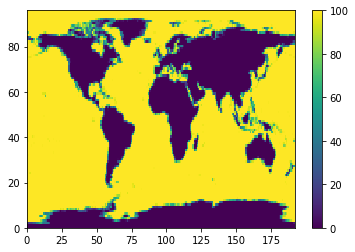

In [211]:
plt.pcolormesh(p1)
plt.colorbar()

In [100]:
np.unique(p1)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [ ]:
#### MAKE MASK
## initialize an array with sizes (time, lat lon) relative to the model

available_obs_mask=np.ones(mpi_tas['tas'].shape)
for ym in range(mpi_tas['time'].size):
     available_obs_mask[ym, :, :] = mask_for_available_obs(mpi_tas['tas'], had_sat_sst['temperature_anomaly'], ym)
    
    
## loop through each month for the entire time frame
## send model and had data array (such as for tas) to function 
## function will search for nans in had, then mask out the same spots in model array
## the result should be a binary mask. essentially 1 or nan. or a 1 or 0. 1 meaning keep, nan(0) meaning delete.

## now this binary mask (all, sea, or land) can be applied to any ensemble member of that model
## the mask is time dependant 

#mpi_tas